# Using the MovieLens Small Dataset from https://grouplens.org/datasets/movielens/latest/.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
MOVIES_FILE = 'movies_small.csv'
RATINGS_FILE = 'ratings_small.csv'

In [3]:
import pandas as pd

# Loading datasets
df_movies = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/ML - CS576/RecSys/{MOVIES_FILE}')
df_ratings = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/ML - CS576/RecSys/{RATINGS_FILE}')

In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
df_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [9]:
# Show a genre frequency count.

genres_ct = dict()

for movie_genres in df_movies['genres'].str.split('|').values:
  for g in movie_genres:
    g = g.lower()

    if g != '(no genres listed)':
      genres_ct[g] = genres_ct.get(g, 0) + 1

genres_ct


{'adventure': 1263,
 'animation': 611,
 'children': 664,
 'comedy': 3756,
 'fantasy': 779,
 'romance': 1596,
 'drama': 4361,
 'action': 1828,
 'crime': 1199,
 'thriller': 1894,
 'horror': 978,
 'mystery': 573,
 'sci-fi': 980,
 'war': 382,
 'musical': 334,
 'documentary': 440,
 'imax': 158,
 'western': 167,
 'film-noir': 87}

In [10]:
# Sort genres by count before visualization. Clearly, drama movies are more popular in this dataset.

zipped = zip(genres_ct.keys(), genres_ct.values())
genres_ct_list_sorted = sorted(list(zipped), key=lambda x: x[1])
genres, ct_list = zip(*genres_ct_list_sorted)

<BarContainer object of 19 artists>

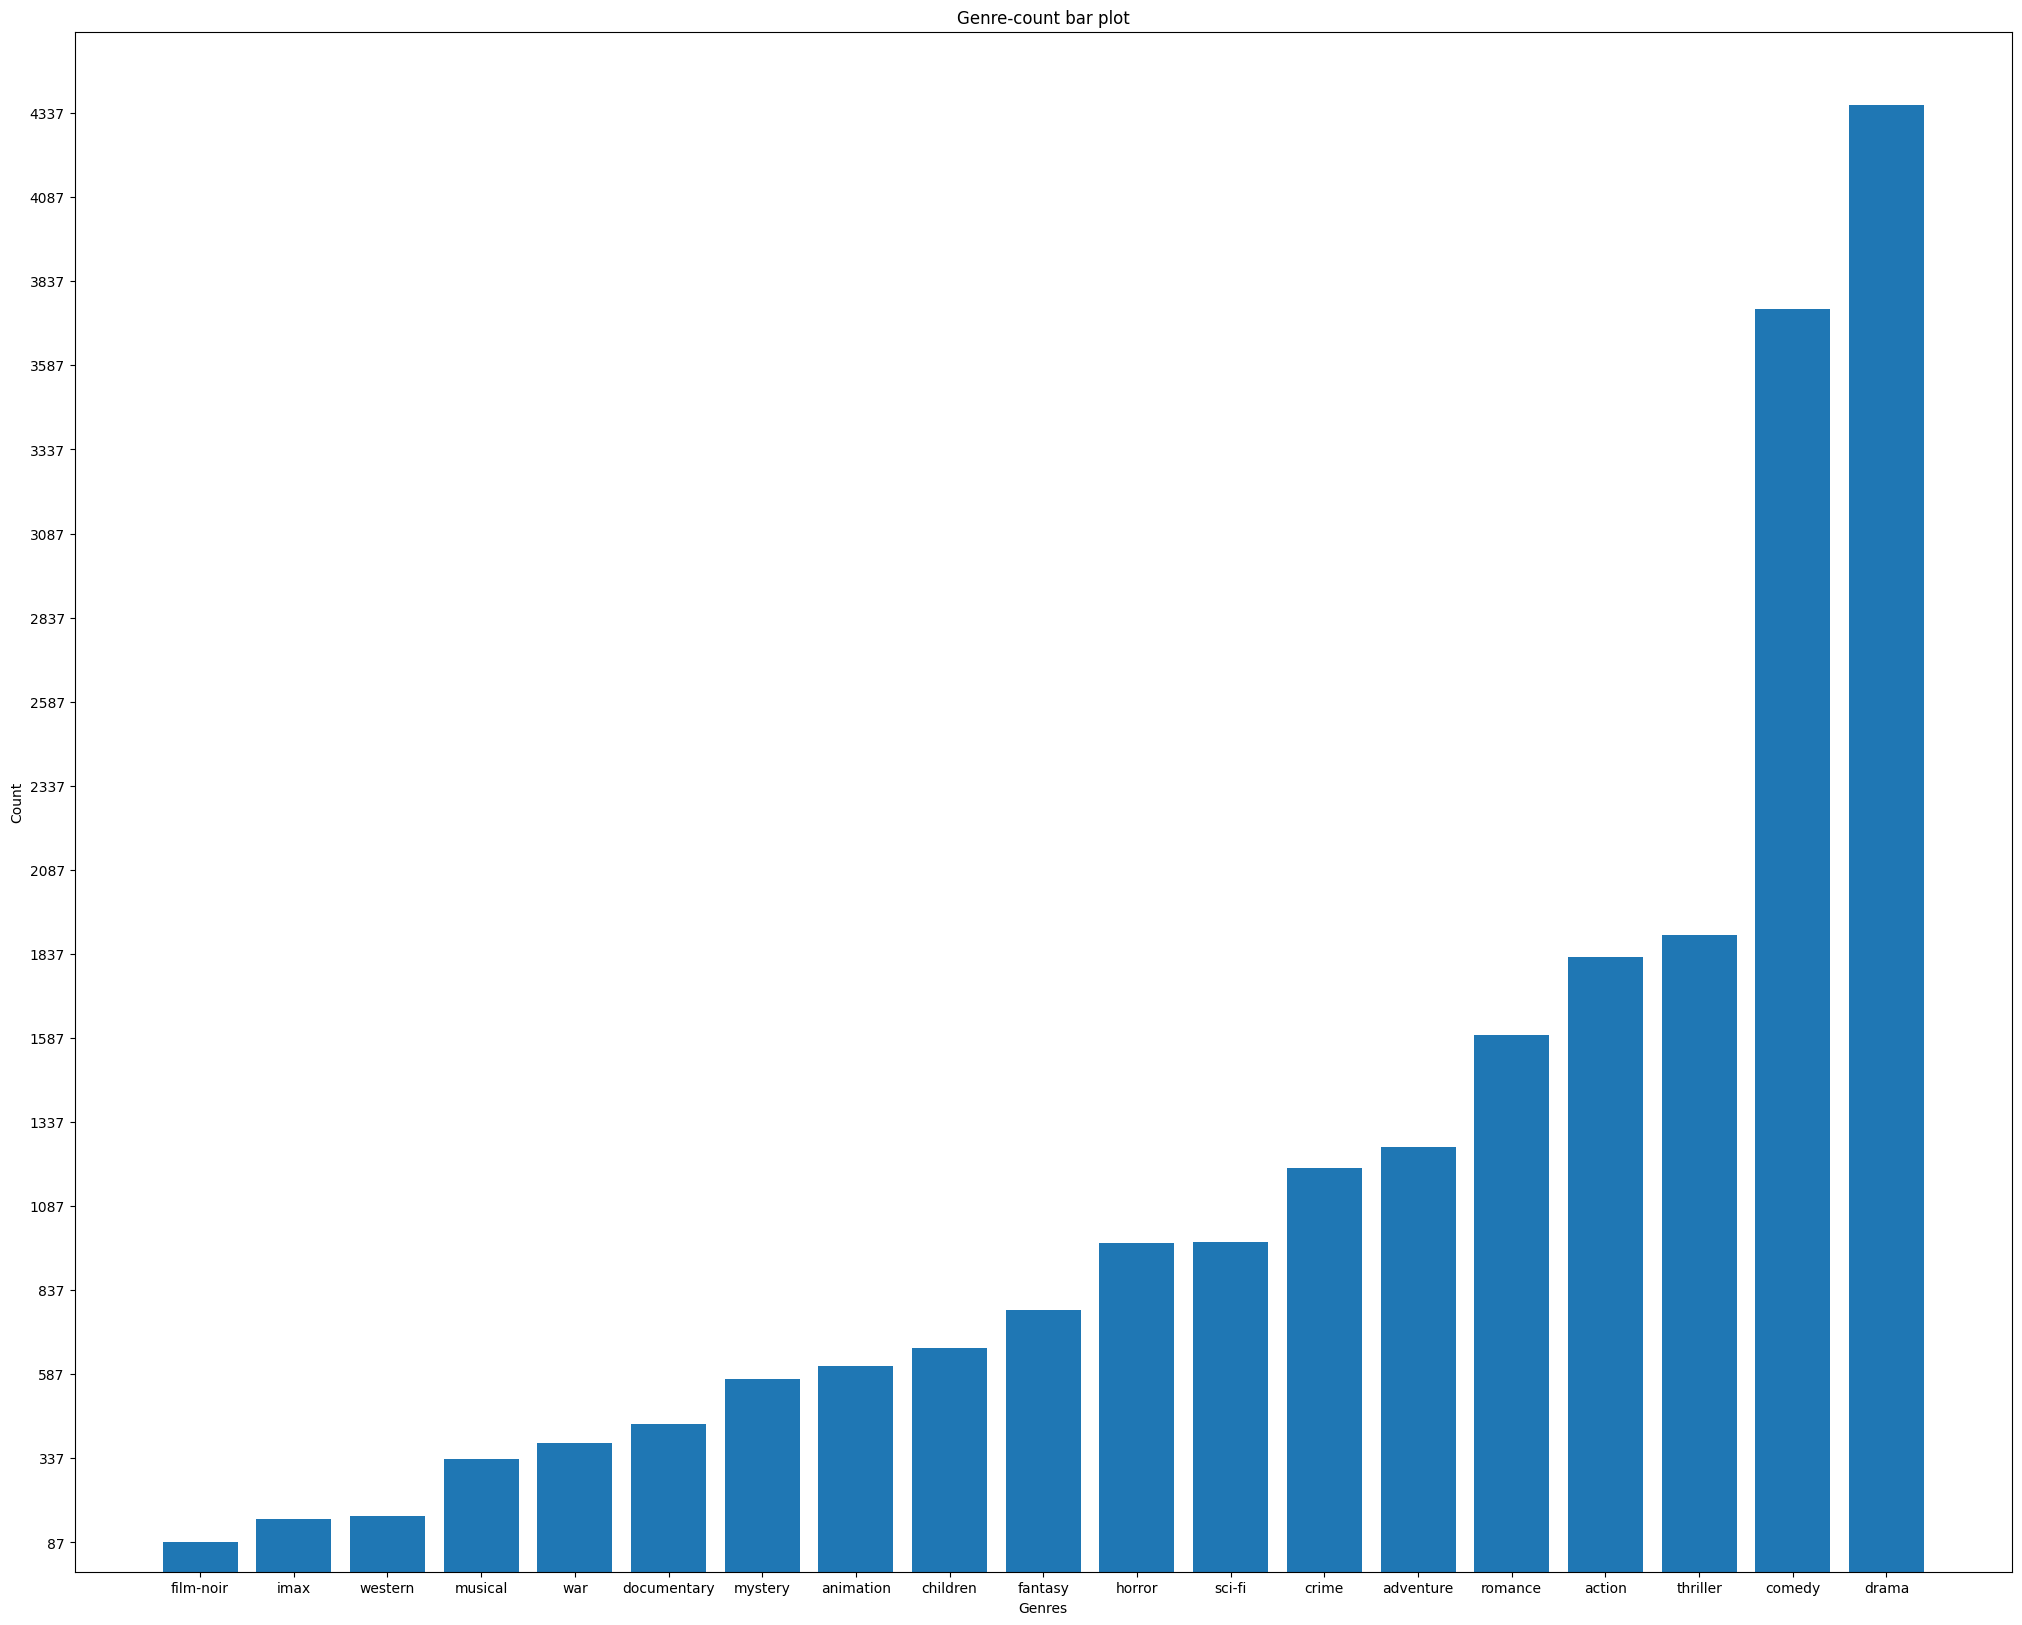

In [11]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(25, 20))
plt.yticks(np.arange(min(genres_ct.values()), max(genres_ct.values()) + 1, 250.0))
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genrewise-count bar plot')
plt.bar(genres, ct_list)

In [65]:
# movie popularity by number of ratings - movies with more ratings could be considered "more popular".
df_movies_popularity = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_popularity = df_movies_popularity.sort_values('count', ascending=False)
df_movies_popularity.head()

,count
movieId,
356,329
318,317
296,307
593,279
2571,278


Text(0.5, 1.0, 'Movie rating frequency plot')

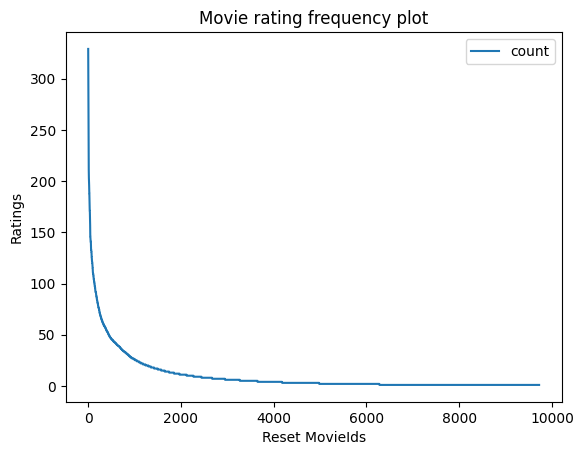

In [13]:
fig = df_movies_popularity.reset_index(drop=True).plot()
fig.set_xlabel('Reset MovieIds')
fig.set_ylabel('Ratings')
fig.set_title('Movie rating frequency plot')

# We clearly see a long-tail distribution. Only some portion of the items are rated frequently.

In [78]:
# Getting percentiles for our movie popularity statistic. Only approximately 5% of the movies have 47 or more ratings.
df_movies_popularity['count'].quantile(np.arange(1, 0, -0.025))

1.000    329.0
0.975     72.0
0.950     47.0
0.925     35.0
0.900     27.0
0.875     21.0
0.850     17.0
0.825     14.0
0.800     12.0
0.775     10.0
0.750      9.0
0.725      7.0
0.700      7.0
0.675      6.0
0.650      5.0
0.625      5.0
0.600      4.0
0.575      4.0
0.550      3.0
0.525      3.0
0.500      3.0
0.475      2.0
0.450      2.0
0.425      2.0
0.400      2.0
0.375      2.0
0.350      1.0
0.325      1.0
0.300      1.0
0.275      1.0
0.250      1.0
0.225      1.0
0.200      1.0
0.175      1.0
0.150      1.0
0.125      1.0
0.100      1.0
0.075      1.0
0.050      1.0
0.025      1.0
Name: count, dtype: float64

In [43]:
df_ratings_ct = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_ct = df_ratings_ct.sort_values('rating', ascending=False)
df_ratings_ct = df_ratings_ct.reset_index()
df_ratings_ct

,rating,count
0,5.0,13211
1,4.5,8551
2,4.0,26818
3,3.5,13136
4,3.0,20047
5,2.5,5550
6,2.0,7551
7,1.5,1791
8,1.0,2811
9,0.5,1370


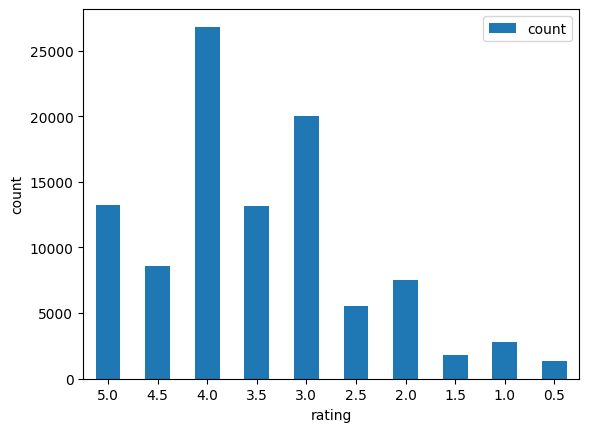

In [56]:
# rating frequency plot.
ax = df_ratings_ct.plot.bar(x='rating', y='count', rot=0, ylabel='count')